## Loading Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('//content//drive')

Mounted at //content//drive


In [ ]:
df=pd.read_excel("/content/drive/MyDrive/DS_CSE 438/Dataset/Daridataset/Dari.xlsx")

## EDA

In [ ]:
df

,tweets,category
0,خیلی کوچیک هستن و سایزشون بدرد نمیخوره میخوام ...,SAD
1,از صدای پرنده دم دمای صبح متنفرم متنفرم متنفرم,HATE
2,"""کیفیتش خیلی خوبه با شک خریدم ولی واقعا راضیم...",SAD
3,چون همش با دوربین ثبت شده ، ایا میشه اعتراض زد...,OTHER
4,اين وضع ب طرز خنده داري گريه داره ...,SAD
...,...,...
7271,یعنی این آهنگ مرغ سحر جوری ساخته شده و روی این...,HAPPY
7272,درود بر همه ایرانیان شریف که در این سرما در تظ...,HAPPY
7273,امروز تولدم است،عید است ولی شاد نیستم،عید و تو...,SAD
7274,لعنت به اونی که دلتنگ نگهت میداره...,SAD


In [ ]:
df1 = df.copy()

In [ ]:
df1

,tweets,category
0,خیلی کوچیک هستن و سایزشون بدرد نمیخوره میخوام ...,SAD
1,از صدای پرنده دم دمای صبح متنفرم متنفرم متنفرم,HATE
2,"""کیفیتش خیلی خوبه با شک خریدم ولی واقعا راضیم...",SAD
3,چون همش با دوربین ثبت شده ، ایا میشه اعتراض زد...,OTHER
4,اين وضع ب طرز خنده داري گريه داره ...,SAD
...,...,...
7271,یعنی این آهنگ مرغ سحر جوری ساخته شده و روی این...,HAPPY
7272,درود بر همه ایرانیان شریف که در این سرما در تظ...,HAPPY
7273,امروز تولدم است،عید است ولی شاد نیستم،عید و تو...,SAD
7274,لعنت به اونی که دلتنگ نگهت میداره...,SAD


In [ ]:
dfmissing_values = df1.isna().sum()
dfmissing_values

tweets      4
category    0
dtype: int64

In [ ]:
df1 = df1.dropna()
df1

,tweets,category
0,خیلی کوچیک هستن و سایزشون بدرد نمیخوره میخوام ...,SAD
1,از صدای پرنده دم دمای صبح متنفرم متنفرم متنفرم,HATE
2,"""کیفیتش خیلی خوبه با شک خریدم ولی واقعا راضیم...",SAD
3,چون همش با دوربین ثبت شده ، ایا میشه اعتراض زد...,OTHER
4,اين وضع ب طرز خنده داري گريه داره ...,SAD
...,...,...
7271,یعنی این آهنگ مرغ سحر جوری ساخته شده و روی این...,HAPPY
7272,درود بر همه ایرانیان شریف که در این سرما در تظ...,HAPPY
7273,امروز تولدم است،عید است ولی شاد نیستم،عید و تو...,SAD
7274,لعنت به اونی که دلتنگ نگهت میداره...,SAD


In [ ]:
unique_words = df1['category'].str.split().explode().unique()
unique_words_list = unique_words.tolist()
print(unique_words_list)


['SAD', 'HATE', 'OTHER', 'FEAR', 'ANGRY', 'HAPPY', 'SURPRISE']


In [ ]:
df1.groupby("category").describe()

tweets                                                               
          count unique                                                top freq
category                                                                      
ANGRY      1077   1070                                            بی ادب     4
FEAR        814    803                                          وحشتناکه     4
HAPPY       892    889                                             مرسی      3
HATE        575    575     از صدای پرنده دم دمای صبح متنفرم متنفرم متنفرم    1
OTHER      1874   1863                                          آخ گفتی      4
SAD        1157   1155  در فلزی بسته به بدنه استوانه ای چسب نواری زده ...    2
SURPRISE    883    876                                              چرا؟     3

In [ ]:
category_counts = df1['category'].value_counts()
print(category_counts)


OTHER       1874
SAD         1157
ANGRY       1077
HAPPY        892
SURPRISE     883
FEAR         814
HATE         575
Name: category, dtype: int64


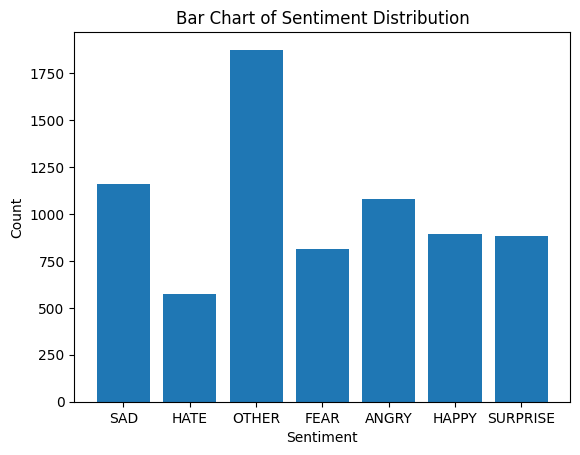

In [ ]:
a =['SAD', 'HATE', 'OTHER', 'FEAR', 'ANGRY', 'HAPPY', 'SURPRISE']

label_0_data = df1[df1["category"] == 'SAD']
label_1_data = df1[df1["category"] == 'HATE']
label_2_data = df1[df1["category"] == 'OTHER']
label_3_data = df1[df1["category"] == 'FEAR']
label_4_data = df1[df1["category"] == 'ANGRY']
label_5_data = df1[df1["category"] == 'HAPPY']
label_6_data = df1[df1["category"] == 'SURPRISE']


label_0_size = len(label_0_data)
label_1_size = len(label_1_data)
label_2_size = len(label_2_data)
label_3_size = len(label_3_data)
label_4_size = len(label_4_data)
label_5_size = len(label_5_data)
label_6_size = len(label_6_data)

labels = ['SAD', 'HATE', 'OTHER', 'FEAR', 'ANGRY', 'HAPPY', 'SURPRISE']
sizes = [label_0_size, label_1_size, label_2_size, label_3_size, label_4_size, label_5_size, label_6_size]

plt.bar(labels, sizes)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Bar Chart of Sentiment Distribution')
plt.show()

Number of Documents: 7272
Average Document Length: 121.27 characters
Minimum Document Length: 4 characters
Maximum Document Length: 3154 characters


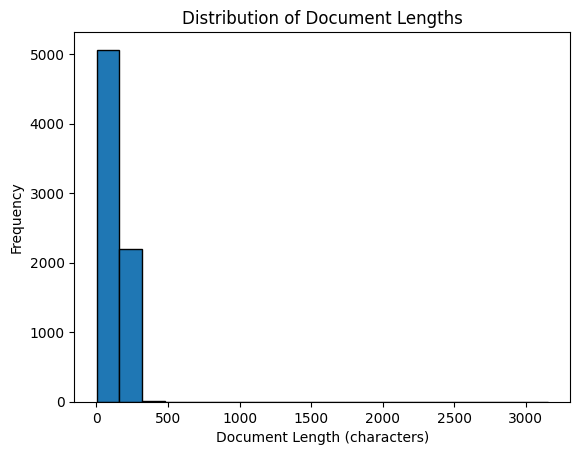

In [ ]:
text_lengths = df1['tweets'].apply(lambda x: len(str(x)) if isinstance(x, (str, float)) else 0)


num_documents = len(df1)
average_length = text_lengths.mean()
min_length = text_lengths.min()
max_length = text_lengths.max()


print(f"Number of Documents: {num_documents}")
print(f"Average Document Length: {average_length:.2f} characters")
print(f"Minimum Document Length: {min_length} characters")
print(f"Maximum Document Length: {max_length} characters")


plt.hist(text_lengths, bins=20, edgecolor='black')
plt.title('Distribution of Document Lengths')
plt.xlabel('Document Length (characters)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
pip install demoji

In [ ]:
import string
import re

def remove_punctuations(text):
    pattern = r'[^\w\s۰-۹آ-ی]'
    text = re.sub(pattern, '', text)
    return text
df1['tweets'] = df1['tweets'].apply(remove_punctuations)

<ipython-input-77-fff555467e15>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tweets'] = df1['tweets'].apply(remove_punctuations)


In [ ]:
import re

def clean_text(text):
    cleaned_text = re.sub(r'[^\w\s]|_+', '', text)
    cleaned_text = re.sub(r'http\S+|www\S+|https\S+', '', cleaned_text)
    cleaned_text = re.sub(r'youtube\S+', '', cleaned_text)
    cleaned_text = re.sub(r'[(){}\[\]]', '', cleaned_text)
    cleaned_text = re.sub(r'[&#<>\\/|]', '', cleaned_text)
    return cleaned_text
df1['tweets'] = df1['tweets'].apply(clean_text)


<ipython-input-78-a1f3c2902327>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tweets'] = df1['tweets'].apply(clean_text)


In [ ]:
df1

,tweets,category
0,خیلی کوچیک هستن و سایزشون بدرد نمیخوره میخوام ...,SAD
1,از صدای پرنده دم دمای صبح متنفرم متنفرم متنفرم,HATE
2,کیفیتش خیلی خوبه با شک خریدم ولی واقعا راضیم ...,SAD
3,چون همش با دوربین ثبت شده ایا میشه اعتراض زد ...,OTHER
4,اين وضع ب طرز خنده داري گريه داره,SAD
...,...,...
7271,یعنی این آهنگ مرغ سحر جوری ساخته شده و روی این...,HAPPY
7272,درود بر همه ایرانیان شریف که در این سرما در تظ...,HAPPY
7273,امروز تولدم استعید است ولی شاد نیستمعید و تولد...,SAD
7274,لعنت به اونی که دلتنگ نگهت میداره,SAD


In [ ]:
df3 = df1.copy()

In [ ]:
from transformers import AutoTokenizer
# Using Pars-BERT Tokenizer
tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/bert-fa-base-uncased")

In [ ]:
# Calculate the number of tokens in each comment
df3['len_sentence'] = df3['tweets'].apply(lambda t: len(tokenizer.tokenize(t)))
print(df3['len_sentence'].max())
print(df3['len_sentence'].min())

686
0


In [ ]:
# Finding the share of comments with a specific length
def data_gl_than(data, less_than=100.0, greater_than=0.0, col='len_sentence'):
    data_length = data[col].values

    data_glt = sum([1 for length in data_length if greater_than < length <= less_than])

    data_glt_rate = (data_glt / len(data_length)) * 100

    print(f'Texts with word length of greater than {greater_than} and less than {less_than} includes {data_glt_rate:.2f}% of the whole!')


In [ ]:
data_gl_than(df3, 150, 1)

Texts with word length of greater than 1 and less than 150 includes 99.35% of the whole!


In [ ]:
# Set min and max limits of length
minlim, maxlim = 1, 256

In [ ]:
# remove comments with the length of fewer than three words
df3['len_sentence'] = df3['len_sentence'].apply(lambda len_t: len_t if minlim < len_t <= maxlim else None)
df3 = df3.dropna(subset=['len_sentence'])
df3 = df3.reset_index(drop=True)

In [ ]:
df3

,tweets,category,len_sentence
0,خیلی کوچیک هستن و سایزشون بدرد نمیخوره میخوام ...,SAD,12.0
1,از صدای پرنده دم دمای صبح متنفرم متنفرم متنفرم,HATE,9.0
2,کیفیتش خیلی خوبه با شک خریدم ولی واقعا راضیم ...,SAD,44.0
3,چون همش با دوربین ثبت شده ایا میشه اعتراض زد ...,OTHER,22.0
4,اين وضع ب طرز خنده داري گريه داره,SAD,11.0
...,...,...,...
7220,یعنی این آهنگ مرغ سحر جوری ساخته شده و روی این...,HAPPY,57.0
7221,درود بر همه ایرانیان شریف که در این سرما در تظ...,HAPPY,58.0
7222,امروز تولدم استعید است ولی شاد نیستمعید و تولد...,SAD,57.0
7223,لعنت به اونی که دلتنگ نگهت میداره,SAD,8.0


In [ ]:
print(df3['len_sentence'].max())
print(df3['len_sentence'].min())

95.0
2.0


In [ ]:
df3 = df3.drop(columns='len_sentence')


In [ ]:
df3

,tweets,category
0,خیلی کوچیک هستن و سایزشون بدرد نمیخوره میخوام ...,SAD
1,از صدای پرنده دم دمای صبح متنفرم متنفرم متنفرم,HATE
2,کیفیتش خیلی خوبه با شک خریدم ولی واقعا راضیم ...,SAD
3,چون همش با دوربین ثبت شده ایا میشه اعتراض زد ...,OTHER
4,اين وضع ب طرز خنده داري گريه داره,SAD
...,...,...
7220,یعنی این آهنگ مرغ سحر جوری ساخته شده و روی این...,HAPPY
7221,درود بر همه ایرانیان شریف که در این سرما در تظ...,HAPPY
7222,امروز تولدم استعید است ولی شاد نیستمعید و تولد...,SAD
7223,لعنت به اونی که دلتنگ نگهت میداره,SAD


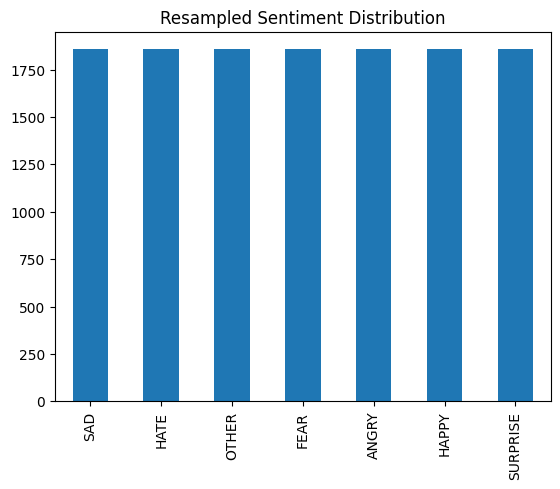

In [ ]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
X = df3[['tweets']]
y = df3['category']
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=['tweets']), pd.DataFrame(y_resampled, columns=['category'])], axis=1)
df_resampled['category'].value_counts().plot(kind='bar', title='Resampled Sentiment Distribution')
plt.show()


In [ ]:
category_mapping = {'SAD': 0, 'HATE': 1, 'OTHER': 2, 'FEAR': 3, 'ANGRY': 4, 'HAPPY': 5, 'SURPRISE': 6}
df_resampled['label'] = df_resampled['category'].map(category_mapping)

In [ ]:
df_resampled

,tweets,category,label
0,خیلی کوچیک هستن و سایزشون بدرد نمیخوره میخوام ...,SAD,0
1,از صدای پرنده دم دمای صبح متنفرم متنفرم متنفرم,HATE,1
2,کیفیتش خیلی خوبه با شک خریدم ولی واقعا راضیم ...,SAD,0
3,چون همش با دوربین ثبت شده ایا میشه اعتراض زد ...,OTHER,2
4,اين وضع ب طرز خنده داري گريه داره,SAD,0
...,...,...,...
12994,عجب حرکتی کیش و مات,SURPRISE,6
12995,مگه اسم تعیین کنندهس,SURPRISE,6
12996,واقعا ادم حیرت میکنه از این سخنان نابخردانه,SURPRISE,6
12997,من نمیدونم از خودم برای دیگران چه تصویری ساخته...,SURPRISE,6


In [ ]:
file_path = 'df_resampled.csv'
df_resampled.to_csv(file_path, index=False)

In [ ]:
df_resampled

,tweets,category,label
0,خیلی کوچیک هستن و سایزشون بدرد نمیخوره میخوام ...,SAD,0
1,از صدای پرنده دم دمای صبح متنفرم متنفرم متنفرم,HATE,1
2,کیفیتش خیلی خوبه با شک خریدم ولی واقعا راضیم ...,SAD,0
3,چون همش با دوربین ثبت شده ایا میشه اعتراض زد ...,OTHER,2
4,اين وضع ب طرز خنده داري گريه داره,SAD,0
...,...,...,...
13113,ی جور مفتضحی مردم انتظار راستگویی و جواب درست ...,SURPRISE,6
13114,دروازه بان میمون عربستان عجب گلی خورد,SURPRISE,6
13115,یه روزی برای استخدام مصاحبه کننده بودم میخواست...,SURPRISE,6
13116,ما ترسناکیم خدایی ن خدایی,SURPRISE,6


#Visualization of PPDATA

In [4]:
pp_ds=pd.read_csv("/content/drive/MyDrive/DS_CSE 438/Dataset/Daridataset/df_resampled.csv")

In [5]:
pip install nltk

In [6]:
!pip install hazm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 371.7/371.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 24.9 MB/s eta 0:00:00
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9296 sha256=3cfabe254913f4d7ab5efab0d13ef179bb8def76426d62414312cee3ee26386e
  Stored in directory: /root/.cache/pip/wheels/bc/be/39/c37ad168eb2ff644c9685f52554440372129450f0b8ed203dd
Successfully built flashtext
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. 

In [8]:
from hazm import word_tokenize
pp_ds['tweets'] = pp_ds['tweets'].apply(lambda comment: word_tokenize(comment))
pp_ds.head()

,tweets,category,label
0,"[خیلی, کوچیک, هستن, و, سایزشون, بدرد, نمیخوره,...",SAD,0
1,"[از, صدای, پرنده, دم, دمای, صبح, متنفرم, متنفر...",HATE,1
2,"[کیفیتش, خیلی, خوبه, با, شک, خریدم, ولی, واقعا...",SAD,0
3,"[چون, همش, با, دوربین, ثبت, شده, ایا, میشه, اع...",OTHER,2
4,"[اين, وضع, ب, طرز, خنده, داري, گريه, داره]",SAD,0


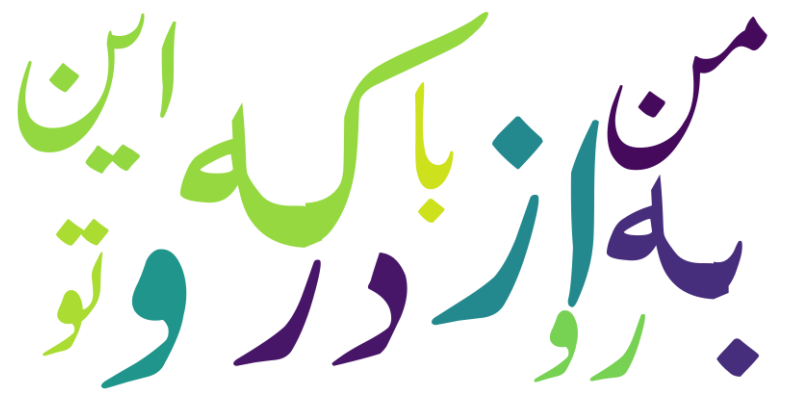

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os
from collections import Counter

font_filename = "/content/drive/MyDrive/NLP1_CSE431/for_urdu_1st_paper/urdu_dataset/Jameel Noori Nastaleeq.ttf"
font_path = os.path.abspath(font_filename)
label_1_data = pp_ds[pp_ds['label'] == 0]
urdu_text = ' '.join(map(str, label_1_data['tweets'].apply(lambda x: ' '.join(x))))
word_counts = Counter(urdu_text.split())

top_words = word_counts.most_common(10)
top_words_text = ' '.join(word for word, count in top_words)
wordcloud = WordCloud(width=800, height=400, font_path=font_path, background_color='white').generate(top_words_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


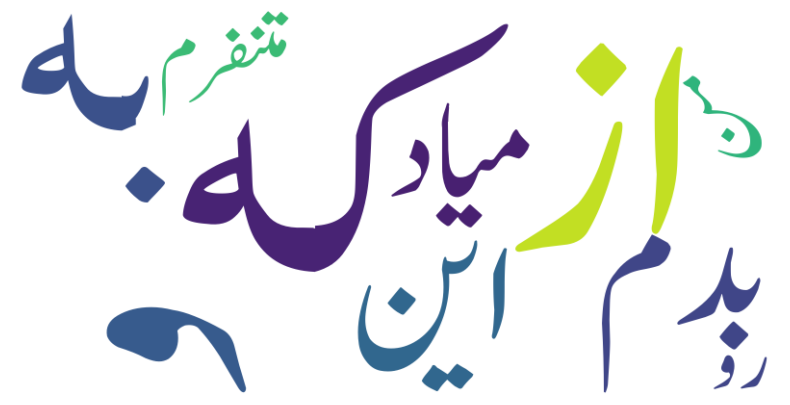

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os
from collections import Counter

font_filename = "/content/drive/MyDrive/NLP1_CSE431/for_urdu_1st_paper/urdu_dataset/Jameel Noori Nastaleeq.ttf"
font_path = os.path.abspath(font_filename)
label_1_data = pp_ds[pp_ds['label'] == 1]
urdu_text = ' '.join(map(str, label_1_data['tweets'].apply(lambda x: ' '.join(x))))
word_counts = Counter(urdu_text.split())

top_words = word_counts.most_common(10)
top_words_text = ' '.join(word for word, count in top_words)
wordcloud = WordCloud(width=800, height=400, font_path=font_path, background_color='white').generate(top_words_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


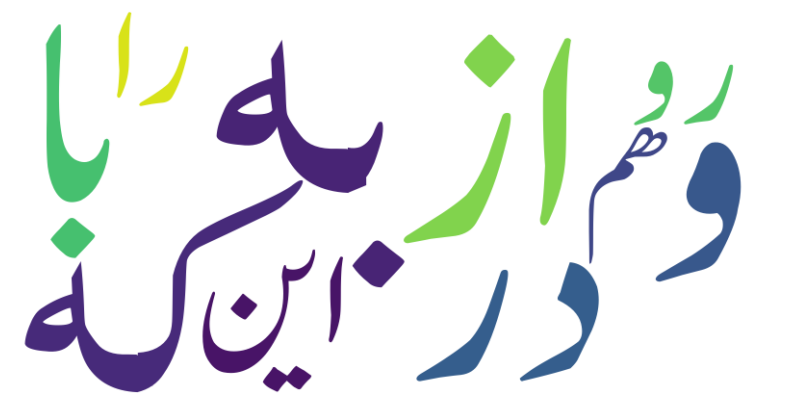

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os
from collections import Counter

font_filename = "/content/drive/MyDrive/NLP1_CSE431/for_urdu_1st_paper/urdu_dataset/Jameel Noori Nastaleeq.ttf"
font_path = os.path.abspath(font_filename)
label_1_data = pp_ds[pp_ds['label'] == 2]
urdu_text = ' '.join(map(str, label_1_data['tweets'].apply(lambda x: ' '.join(x))))
word_counts = Counter(urdu_text.split())

top_words = word_counts.most_common(10)
top_words_text = ' '.join(word for word, count in top_words)
wordcloud = WordCloud(width=800, height=400, font_path=font_path, background_color='white').generate(top_words_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


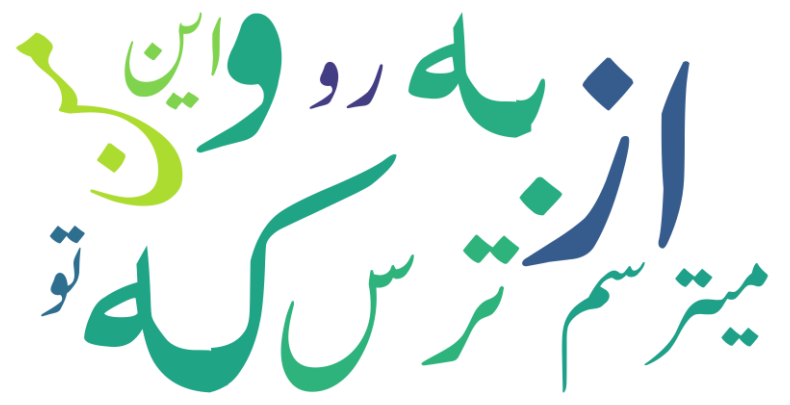

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os
from collections import Counter

font_filename = "/content/drive/MyDrive/NLP1_CSE431/for_urdu_1st_paper/urdu_dataset/Jameel Noori Nastaleeq.ttf"
font_path = os.path.abspath(font_filename)
label_1_data = pp_ds[pp_ds['label'] == 3]
urdu_text = ' '.join(map(str, label_1_data['tweets'].apply(lambda x: ' '.join(x))))
word_counts = Counter(urdu_text.split())

top_words = word_counts.most_common(10)
top_words_text = ' '.join(word for word, count in top_words)
wordcloud = WordCloud(width=800, height=400, font_path=font_path, background_color='white').generate(top_words_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


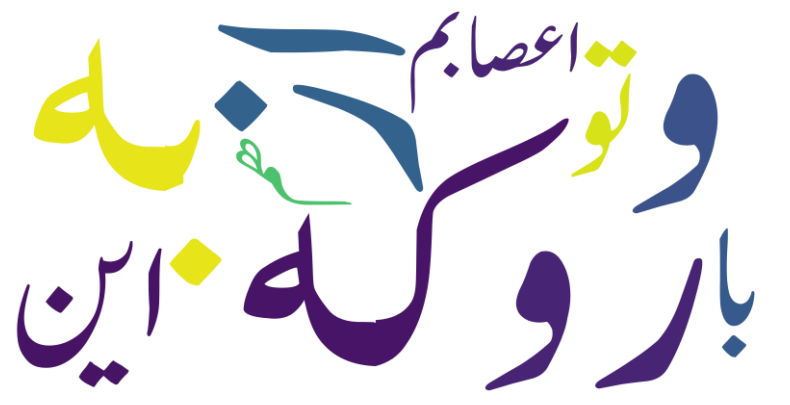

In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os
from collections import Counter

font_filename = "/content/drive/MyDrive/NLP1_CSE431/for_urdu_1st_paper/urdu_dataset/Jameel Noori Nastaleeq.ttf"
font_path = os.path.abspath(font_filename)
label_1_data = pp_ds[pp_ds['label'] == 4]
urdu_text = ' '.join(map(str, label_1_data['tweets'].apply(lambda x: ' '.join(x))))
word_counts = Counter(urdu_text.split())

top_words = word_counts.most_common(10)
top_words_text = ' '.join(word for word, count in top_words)
wordcloud = WordCloud(width=800, height=400, font_path=font_path, background_color='white').generate(top_words_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


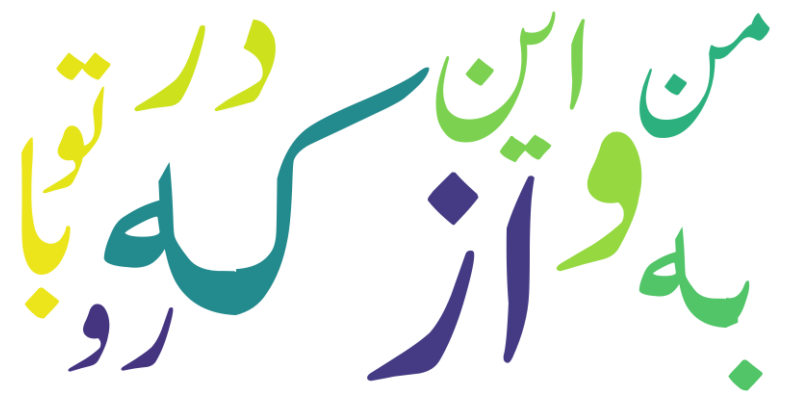

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os
from collections import Counter

font_filename = "/content/drive/MyDrive/NLP1_CSE431/for_urdu_1st_paper/urdu_dataset/Jameel Noori Nastaleeq.ttf"
font_path = os.path.abspath(font_filename)
label_1_data = pp_ds[pp_ds['label'] == 5]
urdu_text = ' '.join(map(str, label_1_data['tweets'].apply(lambda x: ' '.join(x))))
word_counts = Counter(urdu_text.split())

top_words = word_counts.most_common(10)
top_words_text = ' '.join(word for word, count in top_words)
wordcloud = WordCloud(width=800, height=400, font_path=font_path, background_color='white').generate(top_words_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


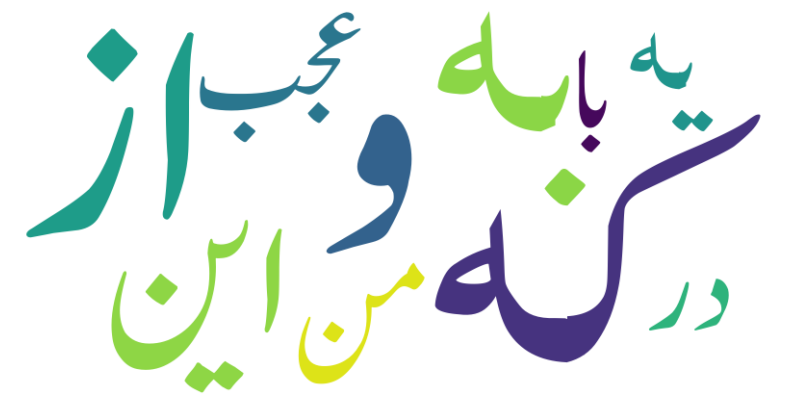

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os
from collections import Counter

font_filename = "/content/drive/MyDrive/NLP1_CSE431/for_urdu_1st_paper/urdu_dataset/Jameel Noori Nastaleeq.ttf"
font_path = os.path.abspath(font_filename)
label_1_data = pp_ds[pp_ds['label'] == 6]
urdu_text = ' '.join(map(str, label_1_data['tweets'].apply(lambda x: ' '.join(x))))
word_counts = Counter(urdu_text.split())

top_words = word_counts.most_common(10)
top_words_text = ' '.join(word for word, count in top_words)
wordcloud = WordCloud(width=800, height=400, font_path=font_path, background_color='white').generate(top_words_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


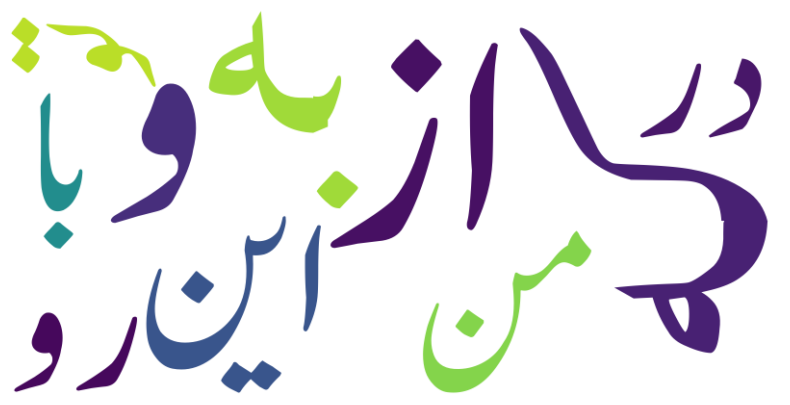

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os
from collections import Counter

font_filename = "/content/drive/MyDrive/NLP1_CSE431/for_urdu_1st_paper/urdu_dataset/Jameel Noori Nastaleeq.ttf"
font_path = os.path.abspath(font_filename)
# label_1_data = pp_ds[pp_ds['label'] == 0]
urdu_text = ' '.join(map(str, pp_ds['tweets'].apply(lambda x: ' '.join(x))))
word_counts = Counter(urdu_text.split())

top_words = word_counts.most_common(10)
top_words_text = ' '.join(word for word, count in top_words)
wordcloud = WordCloud(width=800, height=400, font_path=font_path, background_color='white').generate(top_words_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


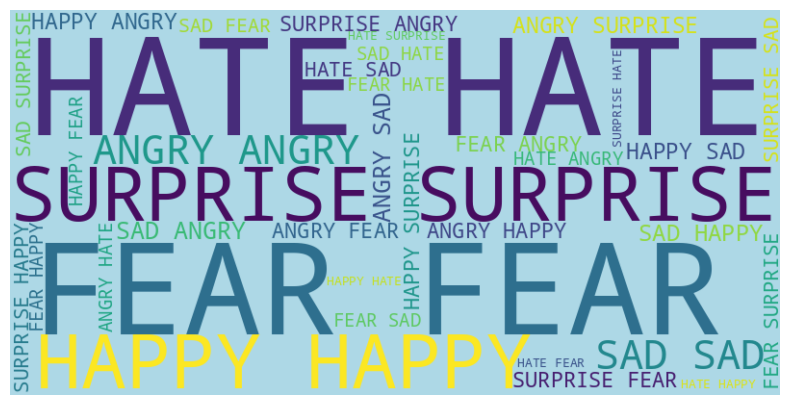

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
filtered_df = pp_ds
text = ' '.join(filtered_df['category'])
wordcloud = WordCloud(width=800, height=400, background_color='lightblue').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [24]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os
from PIL import Image
import numpy as np

mask_path = "h.png"

font_filename = "/content/drive/MyDrive/NLP1_CSE431/for_urdu_1st_paper/urdu_dataset/Jameel Noori Nastaleeq.ttf"
font_path = os.path.abspath(font_filename)
label_1_data = pp_ds
urdu_text = ' '.join(map(str, label_1_data['tweets'].apply(lambda x: ' '.join(x))))
mask = np.array(Image.open(mask_path))
wordcloud = WordCloud(
    width=800,
    height=400,
    font_path=font_path,
    background_color='black',
    mask=mask,
    contour_width=1,
    contour_color='white',
).generate(urdu_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


FileNotFoundError: ignored